In [21]:
import Laplacians as Lap
using SparseArrays
using LinearAlgebra
using Random
using Plots

In [33]:
Random.seed!(1234) # fix the seed
originalGetLDLi(mat) = Lap.approxChol(Lap.LLmatp(mat))
originalApplyLDLi(ldli, mat) = sparse(reduce(hcat, map(x -> Lap.LDLsolver(ldli, Vector(x)), eachcol(mat))))

# get the matrix representation of the forward pass
function forwardWarp(ldli, v)
    y = Vector(deepcopy(v))
    Lap.forward!(ldli, y)
    return y
end
originalApplyForward(ldli, mat) = sparse(reduce(hcat, map(x -> forwardWarp(ldli, Vector(x)), eachcol(mat))))

# get the matrix representation of the backward pass
function backwardWarp(ldli, v)
    y = Vector(deepcopy(v))
    Lap.backward!(ldli, y)
    return y
end
originalApplyBackward(ldli, mat) = sparse(reduce(hcat, map(x -> backwardWarp(ldli, Vector(x)), eachcol(mat))))

originalApplyBackward (generic function with 1 method)

In [91]:
G = Lap.pure_random_graph(50)

50×50 SparseMatrixCSC{Float64, Int64} with 148 stored entries:
⢀⠐⠀⠀⠂⠀⠀⠂⠠⠀⠀⠀⠀⠈⢀⠄⠈⠀⠀⠄⠀⠀⠀⢀⠁
⠀⠀⢀⠐⠀⠀⠀⠀⠀⠀⠉⠀⠔⠀⠑⠀⠀⠀⠀⠄⠀⡠⠀⡀⠀
⠈⠀⠀⠀⠠⠂⢁⠀⠀⠀⠀⡐⠀⠀⠄⠂⢀⠀⠀⠀⠁⠀⠄⠀⠀
⠠⠀⠀⠀⠁⠐⠄⠁⠀⠀⠠⢀⠀⠀⠀⠀⠀⢂⠀⠀⠐⠀⢀⠁⠀
⠀⠂⠀⠀⠀⠀⠀⠀⢀⠐⠀⠀⠡⠁⡠⡀⠂⠀⠀⠀⠀⠀⠄⠀⠁
⠀⠀⠃⠀⢀⠠⠀⢂⠀⠀⢀⠐⠀⠄⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠡
⡀⠀⠐⠁⠀⠀⠀⠀⠅⠂⠀⠄⠀⠀⠀⠀⠀⠀⠀⠁⠄⡀⠐⠀⢀
⠀⠔⠑⠀⠠⠁⠀⠀⠀⠪⠀⠀⠀⠀⠀⠀⠀⡀⡀⠀⢀⠀⠀⠀⠀
⠂⠀⠀⠀⠀⠐⠠⢀⠈⠀⠁⠀⠀⠀⠀⠠⣀⠘⠀⠀⠀⠠⠀⠀⠀
⠀⠄⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠄⠀⠀⠈⠀⠀⢀⠐⢀⠁⠀⠑⠀
⠀⠀⠀⡠⠁⠀⠐⠀⠀⠀⠀⠀⠀⠡⠀⠐⠀⡀⠄⠐⡀⠈⠀⠀⠀
⠀⢀⠀⠠⠀⠁⠄⠐⠀⠁⠀⠀⠐⠀⠀⠀⠀⠀⢄⠀⠀⠀⡀⠈⠐
⠁⠀⠀⠀⠀⠀⠀⠀⠁⠀⠁⠂⠀⠐⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠀

In [110]:
numNodes=60
G = Lap.ErdosRenyi(numNodes, numNodes*5)

60×60 SparseMatrixCSC{Float64, Int64} with 550 stored entries:
⠄⡡⡊⠈⡀⣍⠁⠘⠐⠒⠠⠩⠀⢠⠄⠀⠋⠠⠀⠀⠂⠀⠐⠲⠀⠁⠐⠈⠀⠂
⡊⠈⠊⠀⡂⠁⠠⢄⠠⠀⠀⠀⢠⠠⢀⠀⠼⠠⠁⠀⡬⡉⠨⢀⡀⠠⠈⠄⠀⠠
⡄⢬⠌⠈⠀⠀⢰⠈⠃⠠⢘⠀⠀⠀⠜⠂⠈⢀⠃⢀⢄⠀⠰⠎⠆⠤⠈⢂⢀⠠
⣁⠀⠀⢆⡐⠒⡀⡨⠁⡈⠌⡁⠈⠂⠀⠀⢀⠀⠡⡁⠀⠌⠀⠂⠀⠀⠈⠢⠁⡈
⢰⠀⠀⠂⠉⡀⡁⠠⡀⡨⠠⣀⠁⡀⠡⢂⢠⠀⠰⠰⡁⡉⠲⡀⠈⠝⣄⠄⠄⠀
⡄⡂⠀⠀⠒⠐⠆⠡⠀⢢⡠⠊⡐⡈⠁⠀⠀⠅⢀⠀⢀⠠⠈⠸⢀⠈⠆⠄⠀⢠
⠀⣀⠀⡒⠀⠀⠢⠀⠁⠠⡐⠨⠊⡠⠀⠁⡀⡈⢐⠈⢁⠀⠀⡡⠁⠂⣀⠀⠈⠀
⠀⠁⠀⠐⠲⠁⠀⠀⠡⢂⠁⠀⠄⠀⠀⠀⠀⠎⠀⠈⠠⠈⠀⠀⠚⠔⠠⠀⠢⠄
⠋⡀⠒⡃⠂⢀⠀⠐⠀⠒⠄⠄⡀⠨⡠⠄⠊⠀⡀⠀⢠⢀⠀⠀⠠⡂⠅⡀⠀⡂
⠀⠀⠁⠀⠉⢀⠅⠢⢐⡂⠀⠐⡐⠐⡀⠀⠀⠈⠀⠀⡐⠐⠈⠁⠀⣀⠀⠐⠠⠂
⠈⠀⡆⠫⠀⠑⡀⠄⡅⠨⠀⡐⠁⠐⡀⠂⠀⢒⢐⠈⡀⠈⠆⣄⠀⠀⠐⠀⠈⠁
⢰⡀⠂⢂⡰⠆⠠⠀⠘⠢⣂⡀⠄⡠⠀⠀⠀⠀⠆⠀⠈⢥⡀⠈⠢⠠⠚⠂⠢⢀
⠄⠀⠀⡈⠈⡅⠀⠀⣆⠄⡀⠐⠡⠀⢚⠄⠠⠢⠀⢠⠀⠀⠈⡂⠀⠀⠀⠢⠀⠀
⡐⠀⠂⠄⠢⢀⠢⡀⠀⠝⠈⠅⠀⠘⠀⠂⠁⠡⢀⠀⠐⠀⠺⠀⠠⡀⠀⡠⡠⠌
⠠⠀⠀⡀⠀⡐⡁⠠⠀⠁⠀⣀⠂⠀⠈⠆⠠⠠⠠⠂⠆⠀⠈⢂⠀⠀⡀⠎⠄⠁

In [165]:
ldli = originalGetLDLi(G)

Laplacians.LDLinv{Int64, Float64}([32, 39, 6, 45, 27, 57, 49, 33, 15, 4  …  51, 30, 47, 23, 13, 1, 36, 42, 7, 46], [1, 2, 5, 9, 14, 19, 25, 31, 37, 43  …  428, 436, 443, 450, 455, 460, 464, 467, 469, 470], [20, 13, 16, 58, 1, 5, 9, 34, 18, 42  …  48, 46, 7, 42, 46, 48, 7, 48, 46, 48], [1.0, 0.3333333333333333, 0.5, 1.0, 0.25, 0.3333333333333333, 0.4999999999999999, 1.0, 0.2, 0.24999999999999997  …  0.17684740531995471, 0.3156119954944527, 0.4810871749628766, 1.0, 0.24155148617502928, 0.4847167196749991, 1.0, 0.31585650346240657, 1.0, 1.0], [0.7301449326657674, 0.29761585893731324, 0.7531884048577402, 0.16666666666666677, 0.35153723508944285, 0.25000000000000006, 4.155623670612812, 0.11071752203641164, 0.37759410363087964, 0.29051315853718057  …  0.2096730357754851, 0.12500000000000022, 0.2524774006189365, 0.24654786094239944, 0.3553600709016536, 0.23390392191442044, 0.16666666666666677, 0.14285714285714293, 0.12244897959183698, 0.14285714285714307])

In [166]:
Linv = originalApplyForward(ldli, Matrix(1.0I, size(G)))

60×60 SparseMatrixCSC{Float64, Int64} with 1354 stored entries:
⠙⢽⠛⠘⠉⠉⠉⠛⠙⠉⠋⠉⠙⠉⠏⠉⠋⠃⠋⠛⠁⠛⠃⠁⠻⠙⠙⠙⠛⠋
⠤⠬⠽⢤⠤⠤⠤⡥⠤⠤⠤⠤⢤⠤⠤⠤⠤⠤⠥⠤⠤⡥⡅⠄⡤⠤⠤⠤⠤⠤
⠠⣭⣭⢨⢽⢬⢸⣭⢬⠠⣭⠠⢭⡧⡅⠠⠤⡅⡇⣭⠀⡭⡅⠀⣯⢨⠬⢨⣭⡥
⠈⠉⠉⢈⠉⠉⠙⣍⠉⠉⠉⠉⢉⠋⠉⠉⠉⠁⠉⡉⠁⡉⡁⠁⡉⠉⠉⠉⣉⡉
⢠⣭⣭⢨⣭⢬⢨⣭⣽⢤⣭⢠⣭⣥⡅⢤⣤⡅⡥⣭⠄⣭⡇⠀⣭⢸⣬⢬⣭⣥
⠠⣶⠤⢰⢴⠤⢰⣧⢤⠤⣵⢤⣴⡦⡧⠤⠤⡅⡦⣤⠄⡦⡆⠄⣾⢬⠤⠤⣤⣤
⢀⣉⣀⢈⣈⢀⢈⣉⢈⠀⣉⠀⣙⣅⡁⠀⣀⡁⡁⣉⠀⣁⡁⠀⣉⢈⣀⢀⣉⣁
⠰⠶⠶⠰⠶⠶⠰⠶⠶⠲⠶⠰⠶⠶⠗⢶⠶⠆⠖⠶⠆⠶⠆⠀⠾⠲⠶⠲⠶⠶
⣐⣒⣒⢐⣒⣐⣐⣒⣐⣀⣒⣀⣒⣂⣂⣀⣓⣆⣂⣒⡀⣒⡂⡀⣲⣐⣒⣐⣒⣒
⠐⠒⠒⠐⠒⠒⠐⡒⢒⠐⡒⠐⠒⠒⡂⠒⠒⡂⠓⢖⠂⠒⡂⠀⢒⢐⠒⠐⠒⠒
⠚⢛⣛⠘⠛⠛⠚⡟⢛⠚⡛⠚⠛⠛⡓⠚⠛⡓⡓⢛⠓⣟⡇⠂⢛⢚⠛⠚⠛⠛
⣲⣶⣶⣲⣶⣶⣲⣶⣶⣶⣶⣲⣶⣶⣶⣶⣶⣖⣶⣶⣖⣶⣗⣆⣶⣶⣶⣶⣶⣶
⠠⠤⠤⠠⠤⠤⠠⠤⠤⠤⠤⠠⠤⠤⠄⠤⠤⠄⠤⠤⠄⠤⠄⠀⠵⢤⠤⠤⠤⠤
⠠⢽⣶⢸⠬⠤⠨⣷⠴⠠⡮⠠⢼⠥⡇⠤⠥⡇⡧⡶⠄⡷⡇⠀⣿⢰⠵⢤⣶⡮
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠕⢄

In [167]:
LTinv = originalApplyBackward(ldli, Matrix(1.0I, size(G)))

60×60 SparseMatrixCSC{Float64, Int64} with 1354 stored entries:
⣗⣄⡀⡇⡄⣦⡆⠀⡄⣶⢠⣦⡄⢰⢰⡆⢰⢸⢰⠀⣾⢀⢸⣾⠀⡆⣄⣆⠀⠀
⣛⠀⠓⣇⡃⣛⡃⢀⡃⣛⢀⣃⡀⢘⢘⡃⢘⢘⢘⠀⣛⠘⢸⣻⠀⡃⣘⣛⠀⠀
⡇⠀⠀⡇⡓⣗⡇⠀⡃⣟⠐⡗⠂⢘⢸⡇⢘⢸⢸⠀⣿⠀⢸⣿⠀⡇⠂⡇⠀⠀
⣧⠀⠄⡧⡖⣶⡗⢤⡆⣶⠴⣶⡆⢰⢰⡆⢰⢸⢰⠠⣾⠤⢸⣾⠀⡆⢦⣦⠀⠀
⡗⠀⠀⡇⠂⡓⡇⠀⠓⣟⠀⡗⠂⠐⢸⡃⠐⢸⢘⠐⣻⠐⢸⣿⠀⡇⠐⡃⠀⠀
⡏⠀⠀⡇⠃⡛⡇⠀⠃⣛⠑⣟⠃⠘⢘⡃⠘⢸⢘⠈⣻⠈⢸⣻⠀⡃⠊⡋⠀⠀
⡗⠀⠀⡗⠧⡷⡧⠐⠇⣿⠰⡿⠗⢼⢸⡇⠸⢸⢸⠀⣿⠀⢸⣿⠀⡇⠖⡗⠀⠀
⡏⠁⠀⡇⠁⡉⡇⠀⠁⣍⠉⡏⠁⠈⢹⣅⠈⢸⢨⠈⣹⠈⢸⣿⠀⡅⠉⡍⠀⠀
⠯⠀⠀⡇⠄⠧⠇⠀⠄⠿⠄⠧⠄⠸⠸⠇⠹⢼⠸⠠⢿⠠⢸⢿⠀⠇⠥⠧⠀⠀
⣯⠀⠁⡇⡍⣭⡇⠠⡅⣯⠈⣯⡅⢨⢸⡅⢨⢸⢹⢄⣽⢈⢸⣿⠀⡇⢩⡯⠠⠀
⣥⠀⠄⡧⡄⡤⡅⠠⡄⣥⠠⡥⠄⢠⢨⡅⢠⢨⢨⠀⣽⢤⢸⣽⠀⡅⢤⡥⠀⠀
⠍⠀⠁⠍⠁⠉⠅⠈⠉⠉⠈⠍⠁⠈⠈⠁⠈⠨⠈⠈⠩⠉⠹⢽⠀⠁⠉⠉⠀⠀
⣟⠂⠀⡏⡋⣛⡇⠈⣃⣛⡚⣟⡃⢘⢺⡃⢘⢺⢘⢐⣻⢐⢸⣿⠑⣇⢛⣛⠀⠀
⣗⠀⠀⡇⡂⣃⡇⠀⡂⣟⠀⡇⠀⢘⢸⡃⢘⢸⢘⠀⣻⠀⢸⣿⠀⡇⠑⣇⠀⠀
⡿⠀⠀⡇⠇⡿⡇⠸⠇⣿⠀⣿⠇⢸⢸⡇⢸⢸⢸⠀⣿⠀⢸⣿⠀⡇⡸⡿⠑⢅

In [168]:
Linv' ≈ LTinv

true

In [119]:
t = LTinv * Linv 

60×60 SparseMatrixCSC{Float64, Int64} with 3600 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿

In [96]:
length(Linv.nzval)/(50 * (50 -1))

0.22857142857142856

In [107]:
nList = Int64[]
densityList = Float64[]
for n in 20:10:100
    for j in 1:10
        G = pure_random_graph(n)
        ldli = originalGetLDLi(G)
        ops = length(originalApplyForward(ldli, Matrix(1.0I, size(G))).nzval)
        push!(nList, n)
        push!(densityList, ops/(n * (n - 1)))
    end
end

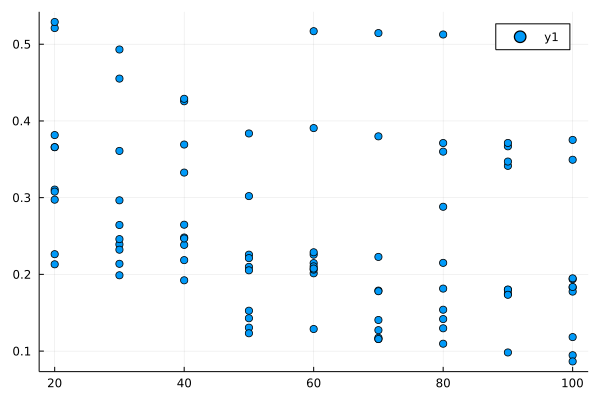

In [109]:
scatter(nList, densityList)

In [121]:
unique(ldli.col)

59-element Vector{Int64}:
 32
 39
  6
 45
 27
 57
 49
 33
 15
  4
 58
 60
 50
  ⋮
 55
 41
 38
 47
 36
 17
 11
 53
 48
 42
  1
 20

In [124]:
sparse(inv(Matrix(Linv)))

60×60 SparseMatrixCSC{Float64, Int64} with 1534 stored entries:
⠛⢿⠛⠛⠛⠛⠛⠟⠛⠋⠟⠛⠛⠛⠟⠛⠛⠟⠛⠛⠛⠛⠛⠛⠻⠻⠛⠻⠟⠛
⠀⠌⠙⢤⠠⠠⠤⡅⠠⠀⠤⠄⢤⠤⠄⠀⠄⠄⠅⠄⠀⡁⡅⠀⡤⠠⠨⢨⡥⠤
⠭⣭⠭⠭⢽⢭⢽⡭⠭⠭⣭⠭⣭⡭⡭⠭⠭⡭⡯⠭⠭⠭⠭⠭⣯⢭⠭⢭⣭⡭
⣀⣈⣀⣀⣈⣀⣙⣅⣀⣀⣉⣀⣉⣃⣁⣀⣀⣁⣁⣁⣀⣀⣁⣀⣉⣈⣈⣈⣉⣉
⣭⣭⣭⣭⣭⣭⣭⣭⣽⣭⣭⣭⣭⣭⣭⣭⣭⣭⣭⣭⣭⣭⣯⣭⣭⣽⣭⣭⣭⣭
⠀⣲⠀⠀⢰⢀⣴⡇⠀⠀⣷⣄⣒⣆⡃⠀⡀⡇⡄⡆⠀⠀⡄⠀⣾⢸⢠⢸⣗⣤
⠀⣀⠀⠀⢀⢀⢀⡀⠀⠀⣀⠀⣙⣄⡀⠀⡀⡀⡀⡁⠀⠀⠀⠀⣁⢀⢀⢀⣈⠀
⠶⠶⠶⠶⠶⠶⠶⠶⠶⠶⠶⠶⠶⠶⠷⢶⠶⠶⠶⠶⠶⠶⠶⠶⠾⠶⠶⠶⠶⠶
⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣖⣒⡓⣖⣒⣒⡒⣒⣒⣒⣲⣒⣒⣒⣒⣒
⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒⣓⣖⣒⣒⣒⣒⣒⣒⣒⣒⣒⣒
⠛⣛⡛⠛⢛⠛⣛⡟⠛⠛⣛⡛⣛⡛⡛⠛⠛⡛⡛⡛⠛⢟⡟⠛⣛⢛⢛⢻⣟⢛
⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣶⣷⣶⣶⣶⣶⣶⣶⣶
⠀⠀⠀⠀⠀⠀⠀⠄⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠄⠄⠀⠑⢄⠀⠠⠄⠀
⠥⠩⠉⠭⠭⠩⠭⡭⠩⠍⠩⠭⠍⠍⠭⠭⠭⠭⠍⠍⠭⠭⠯⠭⠭⠭⠹⢭⡭⠭
⠀⠀⠀⠀⠀⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠠⠕⢄

In [132]:
Lap.condNumber(G, ldli; verbose = true)

lower: 0.6378287213071996, upper: 1.6315815406925598


2.5580245702148865

In [128]:
cond(Matrix(originalApplyLDLi(ldli, Lap.lap(G))))

1.3438362135446234e16

In [130]:
g = function(b)
    b + 1
end

#23 (generic function with 1 method)

In [131]:
g(2)

3

In [171]:
t = Lap.ldli2Chol(ldli)

60×60 SparseMatrixCSC{Float64, Int64} with 529 stored entries:
⠗⣄⡀⠁⡀⣆⠀⠀⠀⠒⠠⠢⠀⢠⠠⠂⠐⠨⠐⠀⠊⠀⠘⠺⠀⠀⠀⠀⠀⠀
⡊⠀⠓⣄⡃⠁⠀⢀⠀⠈⢀⠀⠀⠀⢀⠀⠘⠀⠀⠀⡈⠈⢨⣠⠀⠀⢈⠈⠀⠀
⡅⠀⠀⠆⡑⣄⠅⠀⠃⠅⠐⠄⠀⢀⠸⠂⠈⢐⢀⠀⣌⠀⢸⣮⠀⡄⠀⡆⠀⠀
⣁⠀⠀⠆⡐⠒⡑⢤⠀⡀⠄⡐⡀⠀⠀⡀⢀⠈⠠⠀⠈⠄⠈⢊⠀⠀⢀⢢⠀⠀
⡐⠀⠀⠂⠀⡁⡅⠀⠑⣌⠀⡅⠀⠀⢨⠂⠀⠨⠐⠐⣑⠀⢸⣥⠀⠅⠀⠁⠀⠀
⡄⠀⠀⡄⠂⠐⠆⠀⠀⢂⠑⣏⠂⠈⢀⠂⠀⢰⢀⠈⢠⠈⢨⢸⠀⠀⠂⠈⠀⠀
⠀⠀⠀⡒⠁⠀⠣⠀⠁⢠⠐⡨⠓⢤⢈⠁⠀⢈⢘⠀⢁⠀⢀⣡⠀⠃⠀⠀⠀⠀
⠀⠁⠀⠆⠀⠁⠆⠀⠁⢄⠁⠂⠀⠀⠹⢄⠀⠸⠠⠈⠰⠈⠰⠶⠀⠄⠀⠀⠀⠀
⠋⠀⠀⡃⠀⠀⠀⠀⠀⠒⠄⠆⠀⠸⠠⠄⠙⢄⠀⠀⢲⠀⢀⢐⠀⠂⠅⠄⠀⠀
⠂⠀⠁⠂⠉⢀⠅⠠⠀⡂⠀⠂⡀⠀⢀⠀⠀⠘⠑⢄⣐⢀⢘⡃⠀⡂⠀⠂⠠⠀
⠀⠀⠄⠧⠀⡀⡀⠀⡄⡡⠀⡀⠀⠀⠈⠁⠀⢈⢀⠀⡙⢄⠐⣝⠀⠁⢠⠡⠀⠀
⠄⠀⠀⠀⠀⠀⠄⠀⠈⠀⠀⠄⠀⠀⠀⠀⠀⠠⠀⠀⠨⠁⠱⢼⠀⠀⠈⠀⠀⠀
⠄⠀⠀⡌⠈⡁⠄⠀⣂⠀⡀⠐⠁⠀⢺⠀⠀⠢⠀⢀⠠⠀⠨⡦⠑⢄⠀⠂⠀⠀
⣔⠀⠀⠅⠂⢁⠃⠀⠀⡝⠀⡇⠀⢘⠠⠂⠈⢠⢀⠀⠸⠀⢸⠜⠀⡄⠑⣄⠀⠀
⠠⠀⠀⡀⠀⡐⡃⠰⠀⠁⠀⣀⠂⠀⠈⠆⠠⠠⠠⠀⠆⠀⠈⢂⠀⠀⡀⠮⠑⢅

In [172]:
approxLap = t * t'

60×60 SparseMatrixCSC{Float64, Int64} with 3038 stored entries:
⢿⣷⣿⢿⡿⣿⢿⢻⡟⢿⣿⠿⡿⣿⡿⠗⣿⡿⡿⢸⠿⣻⠿⠿⡷⢿⣿⢿⢗⢿
⣿⣟⣟⣽⣯⣿⣯⣽⣭⣽⣽⣿⣣⣭⣩⡍⣿⣩⣿⣨⣭⣯⣭⣧⣅⣯⣿⣿⣅⣫
⣿⣯⣯⣿⣿⣿⣷⣾⣿⣿⣿⣿⣿⣽⣿⡇⣿⣿⣿⢽⣿⣿⣽⣯⣿⣿⣿⣿⣿⣿
⣿⣓⣏⣿⣹⣿⡱⣮⣻⣛⣟⣿⣿⣻⢿⡇⣿⣿⣻⣝⣿⣾⣍⣋⡓⡷⣏⣿⣽⣿
⣿⣍⣇⣿⣿⣿⣿⢺⣿⣿⣿⣿⣿⣽⣿⣏⣺⣿⣿⣽⣿⣿⣾⣧⣯⣿⣿⣿⣿⣿
⣿⡟⣷⣿⣿⣿⣿⣽⣿⣿⣿⣿⣷⣿⣿⣇⣿⣿⣿⢾⣿⣽⣿⣿⣏⣯⣿⣿⡷⣿
⣿⣯⡍⣾⣟⣿⣿⣻⣟⣿⣽⣿⣟⣽⣹⣧⣾⣽⣛⢛⣷⣿⣤⣧⣫⣟⣿⣻⣛⣻
⢿⠏⡇⠾⠿⠿⠿⠷⡿⢿⠿⢿⠷⣾⠿⢇⢶⠿⠿⠾⠷⡿⠶⠷⠿⠿⣷⠿⠷⠿
⣿⡿⡟⣻⣿⣿⣿⣿⣾⣾⣿⣿⣞⣿⣼⡗⣿⣿⣸⢰⣿⣳⣖⣗⡤⣿⣿⣿⡶⣿
⣛⣋⡛⣻⣟⣟⣟⢾⣟⣿⣻⣟⣿⢘⣻⡇⢒⣚⣟⢝⣛⣻⣚⡇⣛⣟⣿⣛⣿⡿
⣿⣣⡧⣿⣿⣿⣻⣿⣿⣿⣟⣿⣽⣿⣽⡧⢿⣻⣿⣸⣿⣿⣟⣟⣯⣿⣿⣿⣯⣽
⣿⡇⠧⣿⡷⣿⡧⢹⠾⣿⣿⣿⠤⣿⢼⡇⢼⢽⠾⠼⣿⢽⣿⣿⠦⡯⣿⠷⠦⢼
⣽⣏⡥⣽⣿⣿⢽⡬⣯⣿⡯⣽⣯⢾⣿⡇⣤⣯⣿⢼⣯⣿⡬⡧⣿⣿⡭⡿⣿⢾
⣿⣟⣿⣿⣿⣿⣯⣽⣿⣿⣿⣿⣿⣻⣽⡟⣿⣿⣿⢻⣿⣿⢿⡟⣧⡯⣿⣿⣿⣿
⣽⣕⡥⣹⣿⣿⣷⣿⣿⣿⣽⣯⣿⣸⣽⡇⣼⣯⣿⡿⣏⣿⣈⣇⣻⣟⣿⣿⣿⢟

In [173]:
la = Lap.lap(G)

60×60 SparseMatrixCSC{Float64, Int64} with 610 stored entries:
⠕⣥⡊⠈⡀⣍⠁⠘⠐⠒⠠⠩⠀⢠⠄⠀⠋⠠⠀⠀⠂⠀⠐⠲⠀⠁⠐⠈⠀⠂
⡊⠈⠛⢄⡂⠁⠠⢄⠠⠀⠀⠀⢠⠠⢀⠀⠼⠠⠁⠀⡬⡉⠨⢀⡀⠠⠈⠄⠀⠠
⡄⢬⠌⠈⠑⢄⢰⠈⠃⠠⢘⠀⠀⠀⠜⠂⠈⢀⠃⢀⢄⠀⠰⠎⠆⠤⠈⢂⢀⠠
⣁⠀⠀⢆⡐⠒⡑⣬⠁⡈⠌⡁⠈⠂⠀⠀⢀⠀⠡⡁⠀⠌⠀⠂⠀⠀⠈⠢⠁⡈
⢰⠀⠀⠂⠉⡀⡁⠠⡑⣬⠠⣀⠁⡀⠡⢂⢠⠀⠰⠰⡁⡉⠲⡀⠈⠝⣄⠄⠄⠀
⡄⡂⠀⠀⠒⠐⠆⠡⠀⢢⡱⢎⡐⡈⠁⠀⠀⠅⢀⠀⢀⠠⠈⠸⢀⠈⠆⠄⠀⢠
⠀⣀⠀⡒⠀⠀⠢⠀⠁⠠⡐⠨⠛⣤⠀⠁⡀⡈⢐⠈⢁⠀⠀⡡⠁⠂⣀⠀⠈⠀
⠀⠁⠀⠐⠲⠁⠀⠀⠡⢂⠁⠀⠄⠀⠑⢄⠀⠎⠀⠈⠠⠈⠀⠀⠚⠔⠠⠀⠢⠄
⠋⡀⠒⡃⠂⢀⠀⠐⠀⠒⠄⠄⡀⠨⡠⠄⠛⢄⡀⠀⢠⢀⠀⠀⠠⡂⠅⡀⠀⡂
⠀⠀⠁⠀⠉⢀⠅⠢⢐⡂⠀⠐⡐⠐⡀⠀⠀⠈⠑⢄⡐⠐⠈⠁⠀⣀⠀⠐⠠⠂
⠈⠀⡆⠫⠀⠑⡀⠄⡅⠨⠀⡐⠁⠐⡀⠂⠀⢒⢐⠈⡑⢌⠆⣄⠀⠀⠐⠀⠈⠁
⢰⡀⠂⢂⡰⠆⠠⠀⠘⠢⣂⡀⠄⡠⠀⠀⠀⠀⠆⠀⠈⢥⡑⢌⠢⠠⠚⠂⠢⢀
⠄⠀⠀⡈⠈⡅⠀⠀⣆⠄⡀⠐⠡⠀⢚⠄⠠⠢⠀⢠⠀⠀⠈⡂⠑⢄⠀⠢⠀⠀
⡐⠀⠂⠄⠢⢀⠢⡀⠀⠝⠈⠅⠀⠘⠀⠂⠁⠡⢀⠀⠐⠀⠺⠀⠠⡀⠑⣤⡠⠌
⠠⠀⠀⡀⠀⡐⡁⠠⠀⠁⠀⣀⠂⠀⠈⠆⠠⠠⠠⠂⠆⠀⠈⢂⠀⠀⡀⠎⠕⢅

In [174]:
la[1:5,1:5]

5×5 SparseMatrixCSC{Float64, Int64} with 13 stored entries:
 13.0    ⋅   -1.0    ⋅     ⋅ 
   ⋅   12.0    ⋅     ⋅   -1.0
 -1.0    ⋅    9.0  -1.0    ⋅ 
   ⋅     ⋅   -1.0   6.0  -1.0
   ⋅   -1.0    ⋅   -1.0  11.0

In [175]:
approxLap[1:5,1:5]

5×5 SparseMatrixCSC{Float64, Int64} with 23 stored entries:
 10.7348     -0.0333667  -0.535393    ⋅          0.622737
 -0.0333667  12.6082      0.388596   0.0986108  -0.558575
 -0.535393    0.388596   10.5932    -0.745948    0.277072
   ⋅          0.0986108  -0.745948   7.0        -0.99635
  0.622737   -0.558575    0.277072  -0.99635    10.9555

In [176]:
invLinv = sparse(inv(Matrix(Linv)))
invLinv[1:5, 1:5]

5×5 SparseMatrixCSC{Float64, Int64} with 15 stored entries:
 3.46869      -0.451159  -0.380838      2.46331e-16  -2.11636e-16
 1.50671e-16   6.20631   -5.32675e-16  -4.68375e-17  -0.538462
  ⋅             ⋅         3.48623      -1.0            ⋅ 
  ⋅             ⋅          ⋅            6.0            ⋅ 
  ⋅             ⋅          ⋅           -1.0           5.28292

In [177]:
t[1:5, 1:5]

5×5 SparseMatrixCSC{Float64, Int64} with 10 stored entries:
  2.96395     ⋅          ⋅         ⋅         ⋅ 
 -0.246126   3.3858      ⋅         ⋅         ⋅ 
 -0.330516    ⋅         3.02557    ⋅         ⋅ 
   ⋅          ⋅        -0.408248  2.44949  -0.408248
   ⋅        -0.319257    ⋅         ⋅        3.13227

In [181]:
dd = [d == 0 ? 1.0 : 1/d for d in ldli.d]

60-element Vector{Float64}:
 1.3695910979604948
 3.360035999327004
 1.3276890530316605
 5.9999999999999964
 2.8446488740959874
 3.999999999999999
 0.24063776685835808
 9.031994047619042
 2.648346439693239
 3.4421848739495826
 2.0762256450737655
 3.1995650209531115
 1.1199817597224884
 ⋮
 5.9999999999999964
 6.999999999999989
 4.769330478291857
 7.999999999999986
 3.960750536675944
 4.056007609141774
 2.814047164788954
 4.275259652832477
 5.9999999999999964
 6.9999999999999964
 8.16666666666665
 6.999999999999989

In [182]:
inv(Matrix(LTinv * sparse(diagm(dd)) * Linv))

60×60 Matrix{Float64}:
 11.7214       -0.539289     -1.0          …   5.63193e-15   5.99478e-16
 -0.539289     12.1977       -2.04815e-14     -1.0          -1.91686e-14
 -1.0          -1.88751e-14   9.45283         -1.30561e-14   2.3734e-14
 -1.50271e-14  -8.31513e-16  -1.0             -7.78276e-15   9.05721e-15
  0.25         -1.0           0.166667        -1.43942e-14  -1.28168e-14
 -1.0          -5.4779e-15    7.11242e-16  …   9.05566e-15   1.13561e-14
  0.0363828     0.303653      2.21489e-14     -1.32987e-14  -1.0
 -1.0           2.22964e-14   6.49125e-15     -3.02514e-14   1.76556e-14
  0.214008      0.351706      0.166667         2.2985e-14    1.84071e-14
  1.02979e-14  -2.66839e-14   1.29752e-14     -7.12899e-15  -1.33651e-14
 -0.536843     -0.715902     -2.32704      …   4.44369e-14  -1.0
 -1.43857       0.0210041     0.166667        -4.53659e-15   6.48231e-15
 -1.33572       0.202681     -4.60743e-15      0.166667     -1.0
  ⋮                                        ⋱         

In [160]:
ldli.d

60-element Vector{Float64}:
 2.2369657142426926
 0.16754170334265542
 0.3739699659383328
 0.16666666666666677
 0.7142423652084936
 0.25000000000000006
 0.2192343973993776
 0.11278231013954076
 0.3269174216029858
 0.29051315853718074
 1.074548741964224
 0.12495044836693966
 0.2842890230754147
 ⋮
 0.16666666666666677
 0.14285714285714307
 0.15824317352434922
 0.12500000000000022
 0.7992870439711255
 0.1086956521739129
 0.5060842021516294
 0.1714285714285715
 0.16666666666666677
 0.15789473684210537
 0.10179350460494412
 0.14285714285714307

In [184]:
m = Matrix(1.0I, 10, 10)

10×10 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [188]:
t = randn(10)
m[:, 2] = t

10-element Vector{Float64}:
 -1.302870490570615
  0.2749312403310572
  1.1789826867769775
 -0.1824552498288733
  1.0161352046694263
  1.6619906606295904
  0.8199863385149838
  0.44122963135303345
 -0.6994764539671474
  1.7402048133531942

In [189]:
m

10×10 Matrix{Float64}:
 1.0  -1.30287   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.274931  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   1.17898   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  -0.182455  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   1.01614   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0   1.66199   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0   0.819986  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0   0.44123   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  -0.699476  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0   1.7402    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [194]:
invm = inv(m)

10×10 Matrix{Float64}:
 1.0   4.7389   0.0  -0.0  -0.0  -0.0  0.0  -0.0  -0.0  0.0
 0.0   3.63727  0.0  -0.0  -0.0  -0.0  0.0  -0.0  -0.0  0.0
 0.0  -4.28828  1.0  -0.0   0.0  -0.0  0.0  -0.0   0.0  0.0
 0.0   0.66364  0.0   1.0  -0.0  -0.0  0.0  -0.0  -0.0  0.0
 0.0  -3.69596  0.0   0.0   1.0  -0.0  0.0  -0.0   0.0  0.0
 0.0  -6.04511  0.0   0.0   0.0   1.0  0.0  -0.0   0.0  0.0
 0.0  -2.98251  0.0   0.0   0.0   0.0  1.0  -0.0   0.0  0.0
 0.0  -1.60487  0.0   0.0   0.0   0.0  0.0   1.0   0.0  1.99017e-19
 0.0   2.54419  0.0   0.0   0.0   0.0  0.0   0.0   1.0  0.0
 0.0  -6.3296   0.0   0.0   0.0   0.0  0.0   0.0   0.0  1.0

In [195]:
tt = invm[:, 2]

10-element Vector{Float64}:
  4.738895765362166
  3.6372730825200312
 -4.288281991371045
  0.6636395689670284
 -3.6959612281450873
 -6.045113893307693
 -2.982514237114709
 -1.604872661330625
  2.544186877871267
 -6.3296001256813685

In [204]:
1 / inv[2,2]

LoadError: MethodError: no method matching getindex(::typeof(inv), ::Int64, ::Int64)

In [198]:
m * invm

10×10 Matrix{Float64}:
 1.0  -1.29277e-16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   1.0          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0          1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0          0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  -4.44089e-16  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0   0.0          0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0   0.0          0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0   0.0          0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.99017e-19
 0.0   0.0          0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0   0.0          0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0